# Nearest Neighbors

When exploring a large set of documents -- such as Wikipedia, news articles, StackOverflow, etc. -- it can be useful to get a list of related material. To find relevant documents you typically
* Decide on a notion of similarity
* Find the documents that are most similar 

In the assignment you will
* Gain intuition for different notions of similarity and practice finding similar documents. 
* Explore the tradeoffs with representing documents using raw word counts and TF-IDF
* Explore the behavior of different distance metrics by looking at the Wikipedia pages most similar to President Obama’s page.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from scipy.sparse import csr_matrix      # sparse matrices
%matplotlib inline

# Load the Dataset

In [2]:
wiki = pd.read_csv('data_files/people_wiki.csv')
wiki.head(2)

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...


In [3]:
wiki.shape

(59071, 3)

# Extract word count vectors

In [4]:
def load_sparse_csr(filename):
    loader = np.load(filename)
    data = loader['data']
    indices = loader['indices']
    indptr = loader['indptr']
    shape = loader['shape']
    print (data[0],indices[0], indptr[0],shape[0])
    return csr_matrix( (data, indices, indptr), shape)

In [5]:
word_count = load_sparse_csr('data_files/people_wiki_word_count.npz')
word_count

1 5877 0 59071


<59071x547979 sparse matrix of type '<class 'numpy.int64'>'
	with 10379283 stored elements in Compressed Sparse Row format>

In [6]:
type(word_count)

scipy.sparse.csr.csr_matrix

In [7]:
print (word_count[0])

  (0, 5877)	1
  (0, 92219)	1
  (0, 227191)	1
  (0, 446948)	1
  (0, 468870)	1
  (0, 477285)	5
  (0, 492466)	1
  (0, 509506)	1
  (0, 514262)	1
  (0, 523996)	1
  (0, 528953)	1
  (0, 529843)	1
  (0, 533540)	1
  (0, 535034)	3
  (0, 535475)	1
  (0, 538022)	1
  (0, 538168)	1
  (0, 540827)	1
  (0, 541501)	1
  (0, 541760)	1
  (0, 542488)	1
  (0, 542854)	1
  (0, 542859)	1
  (0, 542919)	1
  (0, 543517)	2
  :	:
  (0, 547931)	1
  (0, 547934)	1
  (0, 547935)	1
  (0, 547938)	1
  (0, 547952)	1
  (0, 547956)	1
  (0, 547958)	1
  (0, 547959)	1
  (0, 547960)	1
  (0, 547962)	2
  (0, 547963)	1
  (0, 547964)	3
  (0, 547965)	4
  (0, 547966)	6
  (0, 547967)	5
  (0, 547969)	2
  (0, 547970)	5
  (0, 547971)	4
  (0, 547972)	5
  (0, 547973)	1
  (0, 547974)	4
  (0, 547975)	4
  (0, 547976)	13
  (0, 547977)	4
  (0, 547978)	27


In [8]:
with open('data_files/people_wiki_map_index_to_word.json') as people_wiki_map_index_to_word:    
    map_index_to_word = json.load(people_wiki_map_index_to_word)

In [9]:
map_index_to_word

{'biennials': 522004,
 'lb915': 116290,
 'shatzky': 127647,
 'woode': 174106,
 'damfunk': 133206,
 'nualart': 153444,
 'hatefillot': 164111,
 'missionborn': 261765,
 'yeardescribed': 161075,
 'theoryhe': 521685,
 'vinalop': 222759,
 'soestdijk': 166345,
 'boncea': 150371,
 'spiders': 519990,
 'bienniale': 429277,
 'woody': 541515,
 'trawling': 189895,
 'pampoulovawagner': 201040,
 'bentara': 202586,
 'laserbased': 25758,
 'caner': 346073,
 'canes': 478262,
 'canet': 436468,
 'iaspark': 395341,
 'categoriesborn': 12586,
 '5982': 277649,
 'caney': 459867,
 'phosphorushe': 379479,
 'yusaf': 270311,
 'hhsoffice': 141697,
 '5985': 32985,
 'fsos': 109474,
 'caned': 324502,
 'gaa': 534680,
 'iguau': 456103,
 'storiesin': 513151,
 'braziljorge': 107111,
 'iguaz': 127410,
 'kealhofer': 342134,
 'canek': 159182,
 '2116': 429919,
 'canem': 83461,
 'victorialooking': 58169,
 'martre': 111954,
 'lippert': 491344,
 'pagesolove': 33220,
 'sowell': 489254,
 'weiskopfs': 344360,
 'hedquist': 165506,
 '

# Nearest Neighbor search by raw word count

Let's start by finding the nearest neighbors of the Barack Obama page using the word count vectors to represent the articles and Euclidean distance to measure distance.

In [10]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='euclidean', algorithm='brute')
model.fit(word_count)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [11]:
wiki[wiki['name'] == 'Barack Obama']

,URI,name,text
35817,<http://dbpedia.org/resource/Barack_Obama>,Barack Obama,barack hussein obama ii brk husen bm born augu...


## search 10NN for Obama

In [12]:
distances, indices = model.kneighbors(word_count[35817], n_neighbors=10) # 1st arg: word count vector
print(distances.flatten()[:5])

[ 0.         33.07567082 34.39476704 36.15245497 36.16628264]


In [13]:
neighbors = pd.DataFrame(data = {'distance':distances.flatten()}, index = indices.flatten())
neighbors

,distance
35817,0.000000
24478,33.075671
28447,34.394767
35357,36.152455
14754,36.166283
13229,36.331804
31423,36.400549
22745,36.496575
36364,36.633318
9210,36.959437


In [14]:
wiki.head(2)

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...


In [15]:
wiki.join(neighbors).sort_values('distance')[['name','distance']][0:10]

,name,distance
35817,Barack Obama,0.000000
24478,Joe Biden,33.075671
28447,George W. Bush,34.394767
35357,Lawrence Summers,36.152455
14754,Mitt Romney,36.166283
13229,Francisco Barrio,36.331804
31423,Walter Mondale,36.400549
22745,Wynn Normington Hugh-Jones,36.496575
36364,Don Bonker,36.633318
9210,Andy Anstett,36.959437


All of the 10 people are politicians, but about half of them have rather tenuous connections with Obama, other than the fact that they are politicians.

* Francisco Barrio is a Mexican politician, and a former governor of Chihuahua.
* Walter Mondale and Don Bonker are Democrats who made their career in late 1970s.
* Wynn Normington Hugh-Jones is a former British diplomat and Liberal Party official.
* Andy Anstett is a former politician in Manitoba, Canada.

Nearest neighbors with raw word counts got some things right, showing all politicians in the query result, but missed finer and important details.

For instance, let's find out why Francisco Barrio was considered a close neighbor of Obama.  To do this, let's look at the most frequently used words in each of Barack Obama and Francisco Barrio's pages:

In [16]:
def unpack_dict(matrix, map_index_to_word):
    #table = list(map_index_to_word.sort('index')['category'])
    # if you're not using SFrame, replace this line with
    table = sorted(map_index_to_word, key=map_index_to_word.get)
    
    
    data = matrix.data
    indices = matrix.indices
    indptr = matrix.indptr
    
    num_doc = matrix.shape[0]

    return [{k:v for k,v in zip([table[word_id] for word_id in indices[indptr[i]:indptr[i+1]] ],
                                 data[indptr[i]:indptr[i+1]].tolist())} \
               for i in range(num_doc) ]

wiki['word_count'] = unpack_dict(word_count, map_index_to_word)

In [17]:
wiki.head(3)

,URI,name,text,word_count
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,"{'brisbaneafter': 1, 'edflhe': 1, 'aflfrom': 1..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,"{'maladaptation': 1, 'phasedelay': 1, '25hour'..."
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,"{'germanyover': 1, 'bluesgospel': 1, 'harpdog'..."


## Explore top words for Obama and Barrio

In [18]:
def top_words(name):
    row = wiki[wiki['name'] == name]
    dic = row['word_count'].iloc[0] # return a dict of word count
    word_count_ = pd.DataFrame(dic.items(), columns=['word','count'])
    word_count_table = word_count_.sort_values('count', ascending=False)
    return word_count_table

In [19]:
obama_words = top_words('Barack Obama')
print (obama_words.head(10))
barrio_words = top_words('Francisco Barrio')
print (barrio_words.head(10))

      word  count
272    the     40
270     in     30
271    and     21
269     of     18
266     to     14
258    his     11
71   obama      9
138    act      8
260     he      7
268      a      7
          word  count
224        the     36
221         of     24
223        and     18
222         in     17
212         he     10
218         to      9
19   chihuahua      7
220          a      6
111   governor      6
210        his      5


#### Finding the words that appear in both articles. Sort the common words by their frequencies in Obama's article and take the largest five

In [20]:
combined_words = obama_words.set_index('word').join(barrio_words.set_index('word'),lsuffix='_obama', rsuffix='_barrio')
combined_words.head(10)

,count_obama,count_barrio
word,,
the,40,36.0
in,30,17.0
and,21,18.0
of,18,24.0
to,14,9.0
his,11,5.0
obama,9,NaN
act,8,NaN
he,7,10.0


In [21]:
combined_words = combined_words.rename(columns={'count_obama':'Obama', 'count_barrio':'Barrio'})
combined_words.sort_values('Obama', ascending=False)
combined_words.head(10)

,Obama,Barrio
word,,
the,40,36.0
in,30,17.0
and,21,18.0
of,18,24.0
to,14,9.0
his,11,5.0
obama,9,NaN
act,8,NaN
he,7,10.0


### how many articles contain the top_five words

In [22]:
common_words = set(['the', 'in', 'and', 'of', 'to'])  

def has_top_words(word_count_vector):                   # each word count vector is a dictionary.
    unique_words = set(word_count_vector.keys())       # extract the keys of word_count_vector and convert it to a set
    return common_words.issubset(unique_words)


wiki['has_top_words'] = wiki['word_count'].apply(has_top_words)
wiki.head(10)

,URI,name,text,word_count,has_top_words
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,"{'brisbaneafter': 1, 'edflhe': 1, 'aflfrom': 1...",True
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,"{'maladaptation': 1, 'phasedelay': 1, '25hour'...",True
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,"{'germanyover': 1, 'bluesgospel': 1, 'harpdog'...",True
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,"{'fantasticrottensteiner': 1, 'waidmannsfeld':...",True
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,"{'arhm': 3, 'gangstergenka': 1, 'kuhnja': 1, '...",False
5,<http://dbpedia.org/resource/Sam_Henderson>,Sam Henderson,sam henderson born october 18 1969 is an ameri...,"{'historyhenderson': 1, 'onteora': 1, '1991hen...",False
6,<http://dbpedia.org/resource/Aaron_LaCrate>,Aaron LaCrate,aaron lacrate is an american music producer re...,"{'pellatfinet': 1, 'lacrates': 1, 'baltimoreaa...",True
7,<http://dbpedia.org/resource/Trevor_Ferguson>,Trevor Ferguson,trevor ferguson aka john farrow born 11 novemb...,"{'2014city': 1, 'kinkajou': 1, 'bunkhousesin':...",True
8,<http://dbpedia.org/resource/Grant_Nelson>,Grant Nelson,grant nelson born 27 april 1971 in london also...,"{'garagehe': 1, 'hardcores': 1, 'wishdokta': 3...",True
9,<http://dbpedia.org/resource/Cathy_Caruth>,Cathy Caruth,cathy caruth born 1955 is frank h t rhodes pro...,"{'caruths': 1, 'deborash': 1, '173182': 1, 'ca...",True


In [23]:
# checkpoint: 

if has_top_words(wiki.iloc[32]['word_count']) == True and len(wiki.iloc[32]['word_count'].keys())==167:
    print('Test Passed!')
else:
    print('Test failed!')

if has_top_words(wiki.iloc[33]['word_count']) == False and len(wiki.iloc[33]['word_count'].keys())==188:
    print('Test Passed!')
else:
    print('Test failed!')

Test Passed!
Test Passed!


In [24]:
len(wiki[wiki['has_top_words']==True])

56066

## Calculate pairwise distance between Obama, Bush, Biden

In [25]:
from sklearn.metrics.pairwise import euclidean_distances
print (wiki.index[wiki['name'] == 'Barack Obama'].tolist())

[35817]


In [26]:
word_count[35817]   # contain 273 words

<1x547979 sparse matrix of type '<class 'numpy.int64'>'
	with 273 stored elements in Compressed Sparse Row format>

In [27]:
# Two equivalent way: Distance between Obama and Bush
print (euclidean_distances(word_count[35817], word_count[28447]))  # word_count is a sparse matrix containing the word count vector for each obs.

print (euclidean_distances(word_count[wiki.index[wiki['name'] == 'Barack Obama']], 
                           word_count[wiki.index[wiki['name'] == 'George W. Bush']]))

[[34.39476704]]
[[34.39476704]]


In [28]:
# Distance between Obama and Biden
print (euclidean_distances(word_count[wiki.index[wiki['name'] == 'Barack Obama'].tolist()], word_count[wiki.index[wiki['name'] == 'Joe Biden'].tolist()]))
# Distance between Bush and Biden
print (euclidean_distances(word_count[wiki.index[wiki['name'] == 'George W. Bush'].tolist()], word_count[wiki.index[wiki['name'] == 'Joe Biden'].tolist()]))

[[33.07567082]]
[[32.75667871]]


## Explore top words for Obama and Bush

In [29]:
obama_words = top_words('Barack Obama')
bush_words = top_words('George W. Bush')
print(obama_words)
print(bush_words)

             word  count
272           the     40
270            in     30
271           and     21
269            of     18
266            to     14
..            ...    ...
94         budget      1
96        receive      1
99     convention      1
100     operation      1
136  representing      1

[273 rows x 2 columns]
            word  count
287          the     39
285           in     22
286          and     14
284           of     14
104         bush     12
..           ...    ...
103     referred      1
106     marriage      1
107       reform      1
108  businessman      1
144   graduating      1

[288 rows x 2 columns]


### Finding the words that appear in both articles. Sort the common words by their frequencies in Obama's article

In [30]:
obama_bush = obama_words.set_index('word').join(bush_words.set_index('word'), lsuffix='_obama', rsuffix='_bush') 
obama_bush.rename(columns={'count_obama':'Obama', 'count_bush':'Bush'}, inplace = True)
obama = obama_bush.sort_values('Obama', ascending=False)
dropped = obama_bush.dropna()
dropped.head(10)

,Obama,Bush
word,,
the,40,39.0
in,30,22.0
and,21,14.0
of,18,14.0
to,14,11.0
his,11,6.0
act,8,3.0
he,7,8.0
a,7,6.0


#### Raw word count approach relies too much on common words. eg. the, a, it. etc.

## Nearest Neighbor search by TF-IDF

Much of the perceived commonalities between Obama and Barrio were due to occurrences of extremely frequent words, such as "the", "and", and "his". So nearest neighbors is recommending plausible results sometimes for the wrong reasons. 

To retrieve articles that are more relevant, we should focus more on rare words that don't happen in every article. **TF-IDF** (term frequency–inverse document frequency) is a feature representation that penalizes words that are too common.  Let's use sklearn's implementation of TF-IDF and repeat the search for the 10 nearest neighbors of Barack Obama:

In [32]:
tf_idf = load_sparse_csr('data_files/people_wiki_tf_idf.npz')
wiki['tf_idf'] = unpack_dict(tf_idf, map_index_to_word) # unpack_dict is a function defined before;

10.986495389225194 5877 0 59071


In [33]:
wiki.head(2)

,URI,name,text,word_count,has_top_words,tf_idf
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,"{'brisbaneafter': 1, 'edflhe': 1, 'aflfrom': 1...",True,"{'brisbaneafter': 10.986495389225194, 'edflhe'..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,"{'maladaptation': 1, 'phasedelay': 1, '25hour'...",True,"{'maladaptation': 10.986495389225194, 'phasede..."


In [34]:
tf_idf[:5]  # dim: 5*547979; an unpacked sparse matrix
wiki['tf_idf'][35817] # packed dictionary: keys and tf-idf used to compute distance

{'husen': 10.986495389225194,
 '2012obama': 10.986495389225194,
 'laureateduring': 10.986495389225194,
 'normalize': 10.293348208665249,
 'brk': 10.293348208665249,
 'doddfrank': 9.887883100557085,
 'obamacare': 9.04058524016988,
 'reauthorization': 8.907053847545358,
 'reinvestment': 8.421546031763658,
 'rodham': 7.690658523220865,
 'stimulus': 7.654290879049991,
 'briefs': 7.460134864609033,
 'taxpayer': 7.431147327735781,
 'repeal': 7.297615935111258,
 'troop': 7.248825770941826,
 'bm': 7.202305755306933,
 '44th': 7.0744723837970485,
 'proposition': 6.926052378678775,
 'romney': 6.843360662833661,
 'unconstitutional': 6.8276123058655225,
 'mitt': 6.812108119329557,
 'mccain': 6.766987684049088,
 'gains': 6.7238155121838785,
 'laden': 6.709829270209139,
 'primaries': 6.669007275688884,
 'recession': 6.642689967371511,
 'unemployment': 6.642689967371511,
 'osama': 6.604468754551313,
 'sufficient': 6.432618497624653,
 'libya': 6.332535039067671,
 'hook': 6.2951475069960505,
 'inaugurat

In [35]:
model_tf_idf = NearestNeighbors(metric='euclidean', algorithm='brute')
model_tf_idf.fit(tf_idf)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [36]:
distances, indices = model_tf_idf.kneighbors(tf_idf[35817], n_neighbors=10)

In [37]:
neighbors = pd.DataFrame(data={'distance':distances.flatten()}, index=indices.flatten())
print (wiki.join(neighbors).sort_values('distance')[['name','distance']][0:10])

                          name    distance
35817             Barack Obama    0.000000
7914             Phil Schiliro  106.861014
46811            Jeff Sessions  108.871674
44681   Jesse Lee (politician)  109.045698
38376           Samantha Power  109.108106
6507              Bob Menendez  109.781867
38714  Eric Stern (politician)  109.957788
44825           James A. Guest  110.413889
44368     Roland Grossenbacher  110.470609
33417            Tulsi Gabbard  110.696998


In [42]:
def top_words_tf_idf(name):
    row = wiki[wiki['name'] == name]
    dic = row['tf_idf'].iloc[0]  # return the dict
    word_weight_ = pd.DataFrame(data = dic.items(), columns=['word','weight'])
    word_weight_table = word_weight_.sort_values(['weight'], ascending=False) #the weight here = tf_idf
    return word_weight_table

Let's determine whether this list makes sense.
* With a notable exception of Roland Grossenbacher, the other 8 are all American politicians who are contemporaries of Barack Obama.
* Phil Schiliro, Jesse Lee, Samantha Power, and Eric Stern worked for Obama.

Clearly, the results are more plausible with the use of TF-IDF. Let's take a look at the word vector for Obama and Schilirio's pages. Notice that TF-IDF representation assigns a weight to each word. This weight captures relative importance of that word in the document. Let us sort the words in Obama's article by their TF-IDF weights; we do the same for Schiliro's article as well.

In [43]:
# print top 10 words for Obama and Schiliro
obama_tf_idf = top_words_tf_idf('Barack Obama')
print (obama_tf_idf.head(10))

schiliro_tf_idf = top_words_tf_idf('Phil Schiliro')
print (schiliro_tf_idf.head(10))

            word     weight
71         obama  43.295653
138          act  27.678223
97          iraq  17.747379
129      control  14.887061
191          law  14.722936
69       ordered  14.533374
155     military  13.115933
105  involvement  12.784385
104     response  12.784385
166   democratic  12.410689
               word     weight
1          schiliro  21.972991
42            staff  15.856442
17    congressional  13.547088
0   daschleschiliro  10.986495
13            obama   9.621256
2            waxman   9.040585
82        president   9.033587
3          2014from   8.683910
65              law   7.361468
33       consultant   6.913104


In [44]:
obama_words = top_words_tf_idf('Barack Obama')
schiliro_words = top_words_tf_idf('Phil Schiliro')

obama_bush = obama_words.set_index('word').join(schiliro_words.set_index('word'), lsuffix='_obama', rsuffix='_schiliro')
obama_bush = obama_bush.rename(columns={'weight_obama':'Obama', 'weight_schiliro':'Schiliro'})
obama_bush.sort_values('Obama', ascending=False)
droped = obama_bush.dropna()
print (droped.head(10))

                  Obama  Schiliro
word                             
obama         43.295653  9.621256
law           14.722936  7.361468
democratic    12.410689  6.205344
senate        10.164288  3.388096
presidential   7.386955  3.693478
president      7.226869  9.033587
policy         6.095386  3.047693
states         5.473201  1.824400
office         5.248173  2.624086
2011           5.107041  3.404694


In [45]:
common_words = set(['obama', 'law', 'democratic', 'senate', 'presidential'])

def has_top_words(word_count_vector):
    unique_words = set(word_count_vector.keys())   
    return common_words.issubset(unique_words) 

In [46]:
wiki['has_top_words'] = wiki['word_count'].apply(has_top_words)
wiki.head(2)

,URI,name,text,word_count,has_top_words,tf_idf
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,"{'brisbaneafter': 1, 'edflhe': 1, 'aflfrom': 1...",False,"{'brisbaneafter': 10.986495389225194, 'edflhe'..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,"{'maladaptation': 1, 'phasedelay': 1, '25hour'...",False,"{'maladaptation': 10.986495389225194, 'phasede..."


In [47]:
len(wiki[wiki['has_top_words']==True])

14

Notice the huge difference in this calculation using TF-IDF scores instead  of raw word counts. We've eliminated noise arising from extremely common words.

## Choosing metrics

### Raw word_count / TF-IDF+ Euclidean distance, Raw word_count / TF-IDF+ Cosine distance

You may wonder why Joe Biden, Obama's running mate in two presidential elections, is missing from the query results of `model_tf_idf`. Let's find out why. First, compute the distance between TF-IDF features of Obama and Biden.

In [48]:
print (euclidean_distances(tf_idf[wiki.index[wiki['name'] == 'Barack Obama']], 
                           tf_idf[wiki.index[wiki['name'] == 'Joe Biden']]))

[[123.29745601]]


In [49]:
# compute the length of of each wikipedia document
def compute_length(content):
    return len(content['text'].split(' '))

In [50]:
wiki['length'] = wiki.apply(compute_length, axis=1)

In [52]:
wiki.head(2)

,URI,name,text,word_count,has_top_words,tf_idf,length
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,"{'brisbaneafter': 1, 'edflhe': 1, 'aflfrom': 1...",False,"{'brisbaneafter': 10.986495389225194, 'edflhe'...",251
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,"{'maladaptation': 1, 'phasedelay': 1, '25hour'...",False,"{'maladaptation': 10.986495389225194, 'phasede...",223


In [54]:
distances, indices= model_tf_idf.kneighbors(tf_idf[35817], n_neighbors=100)  # tf_idf is a sparse matrix

In [55]:
indices

array([[35817,  7914, 46811, 44681, 38376,  6507, 38714, 44825, 44368,
        33417, 49944,  7950,  6796, 38495, 42859, 52242, 40099, 18125,
        56008, 44227, 31470,  8339,  7653, 55388, 21838, 35186, 18542,
        47129, 11378, 51114, 20159, 57635, 57217, 51017, 55347, 35225,
         6902, 12834,  4032, 56701, 37775, 11143, 11366, 51168, 28867,
        16155,  7488, 40428, 10566, 29795,  7519, 38293, 58803, 35355,
          952,  5620, 54499, 31883, 11996, 29574, 32913, 18484, 45595,
        11779, 26613, 15907, 36149,  7153, 44164,  2295, 57512,  8184,
        40855, 51599, 25148,  4118, 55044,  1318, 58229, 41355, 57051,
        10378, 10515,  6707, 17161,  2818,  6924, 36493, 14088, 27253,
        43551, 43650, 24648, 17412, 17227,  9884, 55613,  6828, 22695,
         4893]])

In [56]:
neighbors = pd.DataFrame({'distance':distances.flatten()},index=indices.flatten())
print(neighbors[:10])
nearest_neighbors_euclidean = wiki.join(neighbors).sort_values('distance')[['name', 'length', 'distance']]
print(nearest_neighbors_euclidean.head(10))

         distance
35817    0.000000
7914   106.861014
46811  108.871674
44681  109.045698
38376  109.108106
6507   109.781867
38714  109.957788
44825  110.413889
44368  110.470609
33417  110.696998
                          name  length    distance
35817             Barack Obama     540    0.000000
7914             Phil Schiliro     208  106.861014
46811            Jeff Sessions     230  108.871674
44681   Jesse Lee (politician)     216  109.045698
38376           Samantha Power     310  109.108106
6507              Bob Menendez     220  109.781867
38714  Eric Stern (politician)     255  109.957788
44825           James A. Guest     215  110.413889
44368     Roland Grossenbacher     201  110.470609
33417            Tulsi Gabbard     228  110.696998


In [62]:
wiki.head(2)

,URI,name,text,word_count,has_top_words,tf_idf,length
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,"{'brisbaneafter': 1, 'edflhe': 1, 'aflfrom': 1...",False,"{'brisbaneafter': 10.986495389225194, 'edflhe'...",251
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,"{'maladaptation': 1, 'phasedelay': 1, '25hour'...",False,"{'maladaptation': 10.986495389225194, 'phasede...",223


#### To illustrate the fact: when computing NN using Euclidean distance(TF-IDF/raw), we favor short articles than longer ones

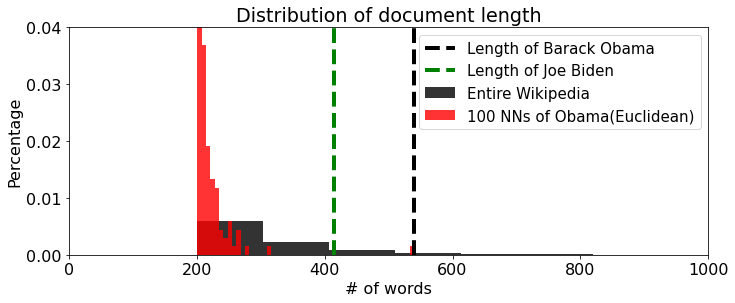

In [71]:
fig, ax = plt.subplots(figsize=(10.5,4.5))

ax.hist(wiki['length'], bins = 50, alpha = 0.8, density = True, 
        color = 'black', label = 'Entire Wikipedia')
ax.hist(nearest_neighbors_euclidean['length'][:100], 
        bins = 50, alpha = 0.8, density = True, 
        color = 'red', label = '100 NNs of Obama(Euclidean)')
#ax.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         #label='Entire Wikipedia', zorder=3, alpha=0.8)
#plt.hist(nearest_neighbors_euclidean['length'][:100], 50, color='r', edgecolor='None', #histtype='stepfilled', #normed=True,
         #label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)

ax.axvline(x=wiki['length'][wiki.index[wiki['name'] == 'Barack Obama']].tolist()[0], color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
ax.axvline(x=wiki['length'][wiki.index[wiki['name'] == 'Joe Biden']].tolist()[0], color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
ax.axis([0, 1000, 0, 0.04])

ax.legend(loc='best', prop={'size':15})
ax.set_title('Distribution of document length')
ax.set_xlabel('# of words')
ax.set_ylabel('Percentage')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

Relative to the rest of Wikipedia, nearest neighbors of Obama are overwhemingly short, most of them being shorter than 300 words. The bias towards short articles is not appropriate in this application as there is really no reason to  **favor short articles over long articles** (they are all Wikipedia articles, after all). Many of the Wikipedia articles are 300 words or more, and both Obama and Biden are over 300 words long.

**While TF-IDF penalizes very common words, longer articles tend to have longer TF-IDF vetors simply because they have more words in them. To remove this bias, we then use cosine distance.**

**Note**: For the interest of computation time, the dataset given here contains _excerpts_ of the articles rather than full text. For instance, the actual Wikipedia article about Obama is around 25000 words. Do not be surprised by the low numbers shown in the histogram.

## Nearest Neighbor search by Cosine distance

To remove this bias, we turn to **cosine distances**:
$$
d(\mathbf{x},\mathbf{y}) = 1 - \frac{\mathbf{x}^T\mathbf{y}}{\|\mathbf{x}\| \|\mathbf{y}\|}
$$
Cosine distances let us compare word distributions of two articles of varying lengths.

Let us train a new nearest neighbor model, this time with cosine distances.  We then repeat the search for Obama's 100 nearest neighbors.

In [75]:
model2_tf_idf = NearestNeighbors(algorithm='brute', metric='cosine')
model2_tf_idf.fit(tf_idf)
distances, indices = model2_tf_idf.kneighbors(tf_idf[35817], n_neighbors=100)
neighbors = pd.DataFrame(data={'distance':distances.flatten()}, index=indices.flatten())
nearest_neighbors_cosine = wiki.join(neighbors)[['name', 'length', 'distance']].sort_values('distance')
nearest_neighbors_cosine.head(10)

,name,length,distance
35817,Barack Obama,540,0.000000
24478,Joe Biden,414,0.703139
38376,Samantha Power,310,0.742982
57108,Hillary Rodham Clinton,580,0.758358
38714,Eric Stern (politician),255,0.770561
46140,Robert Gibbs,257,0.784678
6796,Eric Holder,232,0.788039
44681,Jesse Lee (politician),216,0.790926
18827,Henry Waxman,279,0.798323
2412,Joe the Plumber,217,0.799466


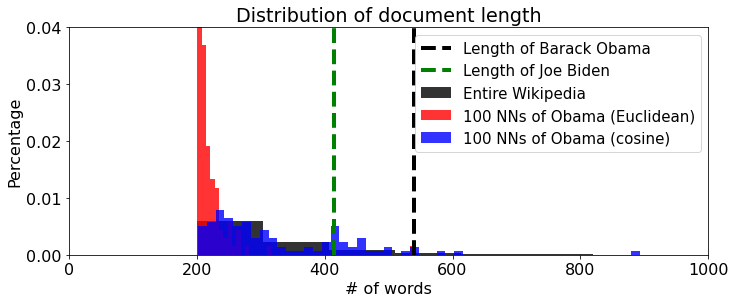

In [76]:
fig, ax = plt.subplots(figsize=(10.5,4.5))

ax.hist(wiki['length'], bins = 50, color='k', density = True,
         label='Entire Wikipedia', alpha=0.8)
ax.hist(nearest_neighbors_euclidean['length'][:100], bins = 50, color='r', density=True,
         label='100 NNs of Obama (Euclidean)',alpha=0.8)
ax.hist(nearest_neighbors_cosine['length'][:100], bins = 50, color='b', density = True,
         label='100 NNs of Obama (cosine)', alpha=0.8)

ax.axvline(x=wiki['length'][wiki.index[wiki['name'] == 'Barack Obama']].tolist()[0], color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
ax.axvline(x=wiki['length'][wiki.index[wiki['name'] == 'Joe Biden']].tolist()[0], color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
ax.axis([0, 1000, 0, 0.04])
ax.legend(loc='best', prop={'size':15})
ax.set_title('Distribution of document length')
ax.set_xlabel('# of words')
ax.set_ylabel('Percentage')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()

Indeed, the 100 nearest neighbors using cosine distance provide a sampling across the range of document lengths, rather than just short articles like Euclidean distance provided.

**Moral of the story**: In deciding the features and distance measures, check if they produce results that make sense for your particular application.

# Problem with cosine distances: tweets vs. long articles

**Problem with cosine distance: it ignore all document lengths, which may be important in certain situations. To illustrate this, we compare a tweet and Obama's Wikipedia page**

```
+--------------------------------------------------------+
|                                             +--------+ |
|  One that shall not be named                | Follow | |
|  @username                                  +--------+ |
|                                                        |
|  Democratic governments control law in response to     |
|  popular act.                                          |
|                                                        |
|  8:05 AM - 16 May 2016                                 |
|                                                        |
|  Reply   Retweet (1,332)   Like (300)                  |
|                                                        |
+--------------------------------------------------------+
```
How similar is this tweet to Barack Obama's Wikipedia article? Let's transform the tweet into TF-IDF features, using an encoder fit to the Wikipedia dataset.  (That is, let's treat this tweet as an article in our Wikipedia dataset and see what happens.)

In [77]:
wiki.head(2)

,URI,name,text,word_count,has_top_words,tf_idf,length
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,"{'brisbaneafter': 1, 'edflhe': 1, 'aflfrom': 1...",False,"{'brisbaneafter': 10.986495389225194, 'edflhe'...",251
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,"{'maladaptation': 1, 'phasedelay': 1, '25hour'...",False,"{'maladaptation': 10.986495389225194, 'phasede...",223


In [81]:
test_data = pd.DataFrame(data = {'democratic governments control law in response to popular act'},
                        columns = ['text'])

In [82]:
test_data

,text
0,democratic governments control law in response...


In [90]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

train_matrix = vectorizer.fit_transform(wiki['text'])

test_matrix = vectorizer.transform(test_data['text'])

In [91]:
vectorizer.vocabulary_

{'digby': 160652,
 'morrell': 336162,
 'born': 96612,
 '10': 704,
 'october': 359577,
 '1979': 11143,
 'is': 259893,
 'former': 203171,
 'australian': 72887,
 'rules': 427313,
 'footballer': 202230,
 'who': 530685,
 'played': 386988,
 'with': 533439,
 'the': 488148,
 'kangaroos': 272528,
 'and': 58906,
 'carlton': 111950,
 'in': 251905,
 'football': 202189,
 'league': 293515,
 'aflfrom': 48415,
 'western': 529346,
 'australia': 72734,
 'his': 239271,
 'early': 172662,
 'senior': 442836,
 'for': 202462,
 'west': 529244,
 'perth': 380905,
 '44game': 34683,
 'career': 111212,
 'falcons': 191106,
 'spanned': 461891,
 '19982000': 16893,
 'he': 233774,
 'was': 525845,
 'clubs': 128392,
 'leading': 293448,
 'goalkicker': 218903,
 '2000': 18132,
 'at': 70622,
 'age': 49200,
 'of': 360068,
 '21': 28353,
 'recruited': 412470,
 'to': 494541,
 'by': 105803,
 'club': 128164,
 'its': 261721,
 'third': 490181,
 'round': 425753,
 'selection': 441507,
 '2001': 18661,
 'afl': 48375,
 'rookie': 424587,
 

In [97]:
print(train_matrix[0])

  (0, 160652)	1
  (0, 336162)	5
  (0, 96612)	1
  (0, 704)	1
  (0, 359577)	1
  (0, 11143)	1
  (0, 259893)	1
  (0, 203171)	1
  (0, 72887)	3
  (0, 427313)	1
  (0, 202230)	1
  (0, 530685)	1
  (0, 386988)	3
  (0, 533439)	5
  (0, 488148)	27
  (0, 272528)	3
  (0, 58906)	4
  (0, 111950)	2
  (0, 251905)	13
  (0, 202189)	10
  (0, 293515)	4
  (0, 48415)	1
  (0, 529346)	1
  (0, 72734)	1
  (0, 239271)	3
  :	:
  (0, 207224)	2
  (0, 23789)	1
  (0, 511222)	1
  (0, 26651)	1
  (0, 470394)	1
  (0, 184523)	1
  (0, 163854)	1
  (0, 25312)	1
  (0, 395008)	1
  (0, 164271)	1
  (0, 395043)	1
  (0, 451997)	1
  (0, 27213)	1
  (0, 232352)	1
  (0, 128951)	1
  (0, 129425)	1
  (0, 55769)	1
  (0, 174268)	1
  (0, 147491)	1
  (0, 483084)	1
  (0, 383407)	1
  (0, 174843)	1
  (0, 373306)	1
  (0, 130972)	1
  (0, 323069)	1


In [93]:
print(test_matrix[0])

  (0, 45073)	1
  (0, 138583)	1
  (0, 155936)	1
  (0, 221556)	1
  (0, 251905)	1
  (0, 292511)	1
  (0, 391350)	1
  (0, 417808)	1
  (0, 494541)	1


In [95]:
# checkpoint:
[word for word, value in vectorizer.vocabulary_.items() 
 if value in [45073,138583,155936,221556,251905,292511,391350,417808,494541]]

['in',
 'to',
 'democratic',
 'law',
 'popular',
 'act',
 'control',
 'governments',
 'response']

In [122]:
''' Error: lower not found
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(train_matrix)
test_tfidf = vectorizer.transform(test_matrix)
'''

' Error: lower not found\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nvectorizer = TfidfVectorizer()\nvectorizer.fit_transform(train_matrix)\ntest_tfidf = vectorizer.transform(test_matrix)\n'

Instead, we directly import the TF-IDF vector for this tweet.

In [99]:
tweet = {'act': 3.4597778278724887,
 'control': 3.721765211295327,
 'democratic': 3.1026721743330414,
 'governments': 4.167571323949673,
 'in': 0.0009654063501214492,
 'law': 2.4538226269605703,
 'popular': 2.764478952022998,
 'response': 4.261461747058352,
 'to': 0.04694493768179923}

In [109]:
map_index_to_word

{'biennials': 522004,
 'lb915': 116290,
 'shatzky': 127647,
 'woode': 174106,
 'damfunk': 133206,
 'nualart': 153444,
 'hatefillot': 164111,
 'missionborn': 261765,
 'yeardescribed': 161075,
 'theoryhe': 521685,
 'vinalop': 222759,
 'soestdijk': 166345,
 'boncea': 150371,
 'spiders': 519990,
 'bienniale': 429277,
 'woody': 541515,
 'trawling': 189895,
 'pampoulovawagner': 201040,
 'bentara': 202586,
 'laserbased': 25758,
 'caner': 346073,
 'canes': 478262,
 'canet': 436468,
 'iaspark': 395341,
 'categoriesborn': 12586,
 '5982': 277649,
 'caney': 459867,
 'phosphorushe': 379479,
 'yusaf': 270311,
 'hhsoffice': 141697,
 '5985': 32985,
 'fsos': 109474,
 'caned': 324502,
 'gaa': 534680,
 'iguau': 456103,
 'storiesin': 513151,
 'braziljorge': 107111,
 'iguaz': 127410,
 'kealhofer': 342134,
 'canek': 159182,
 '2116': 429919,
 'canem': 83461,
 'victorialooking': 58169,
 'martre': 111954,
 'lippert': 491344,
 'pagesolove': 33220,
 'sowell': 489254,
 'weiskopfs': 344360,
 'hedquist': 165506,
 '

In [116]:
word_indices = []
for word in tweet.keys():
    if word in map_index_to_word.keys():
        word_indices.append(map_index_to_word[word]) # find the indices of words this tweet

tweet_tf_idf = csr_matrix((list(tweet.values()), ([0]*len(word_indices), word_indices)),
                         shape = (1, tf_idf.shape[1]))

In [117]:
print(tweet_tf_idf[0])

  (0, 546136)	4.261461747058352
  (0, 546279)	4.167571323949673
  (0, 546835)	3.721765211295327
  (0, 547084)	3.4597778278724887
  (0, 547347)	3.1026721743330414
  (0, 547556)	2.764478952022998
  (0, 547685)	2.4538226269605703
  (0, 547972)	0.04694493768179923
  (0, 547976)	0.0009654063501214492


In [118]:
print(tf_idf[35817])

  (0, 32093)	10.986495389225194
  (0, 103658)	10.986495389225194
  (0, 120780)	10.986495389225194
  (0, 397642)	10.293348208665249
  (0, 409594)	10.293348208665249
  (0, 452469)	9.887883100557085
  (0, 492548)	9.04058524016988
  (0, 499835)	8.907053847545358
  (0, 512805)	8.421546031763658
  (0, 526389)	7.690658523220865
  (0, 526900)	7.654290879049991
  (0, 529331)	7.460134864609033
  (0, 529495)	7.431147327735781
  (0, 531329)	7.297615935111258
  (0, 531869)	7.248825770941826
  (0, 532290)	7.202305755306933
  (0, 533599)	7.0744723837970485
  (0, 534868)	6.926052378678775
  (0, 535658)	6.843360662833661
  (0, 535765)	6.8276123058655225
  (0, 535818)	6.812108119329557
  (0, 536238)	6.766987684049088
  (0, 536530)	6.7238155121838785
  (0, 536610)	6.709829270209139
  (0, 536900)	6.669007275688884
  :	:
  (0, 547950)	3.7773337680052257
  (0, 547953)	0.8871532656125274
  (0, 547954)	1.6946860096423695
  (0, 547955)	0.7674309670437692
  (0, 547956)	2.0868146141979307
  (0, 547957)	0.6614069

In [119]:
# look at the distance between obama and this tweet
from sklearn.metrics.pairwise import cosine_distances
obama_tf_idf = tf_idf[35817]
cosine_distances(obama_tf_idf, tweet_tf_idf) # only a bit larger than Biden

array([[0.70591838]])

In [121]:
distances, indices = model2_tf_idf.kneighbors(obama_tf_idf, n_neighbors=10)
distances
neighbors = pd.DataFrame(data={'distance':distances.flatten()}, index=indices.flatten())
nearest_neighbors_cosine = wiki.join(neighbors)[['name', 'length', 'distance']].sort_values('distance')
nearest_neighbors_cosine.head(10)

,name,length,distance
35817,Barack Obama,540,0.000000
24478,Joe Biden,414,0.703139
38376,Samantha Power,310,0.742982
57108,Hillary Rodham Clinton,580,0.758358
38714,Eric Stern (politician),255,0.770561
46140,Robert Gibbs,257,0.784678
6796,Eric Holder,232,0.788039
44681,Jesse Lee (politician),216,0.790926
18827,Henry Waxman,279,0.798323
2412,Joe the Plumber,217,0.799466


With cosine distances, the tweet is "nearer" to Barack Obama than everyone else, except for Joe Biden!  This probably is not something we want. If someone is reading the Barack Obama Wikipedia page, would you want to recommend they read this tweet? Ignoring article lengths completely resulted in nonsensical results. In practice, it is common to enforce maximum or minimum document lengths. After all, when someone is reading a long article from _The Atlantic_, you wouldn't recommend him/her a tweet.